# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Variables
mu = 50;
sigma = 5;
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

D:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


[NormaltestResult(statistic=0.06684672372244391, pvalue=0.9671290273599207),
 NormaltestResult(statistic=1.5520400955626326, pvalue=0.4602340807284001),
 NormaltestResult(statistic=4.2226507991330315, pvalue=0.12107738412659322),
 NormaltestResult(statistic=0.05902776551833498, pvalue=0.9709173985352155)]

#### Interpret the normaltest results and make your observations.

`Comments:`

Hp: alpha = 5% (0.005) --> Confidence interval 95%
if p < alpha (null hypothesis: x comes from a normal distribution) --> The null hypothesis can be rejected

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

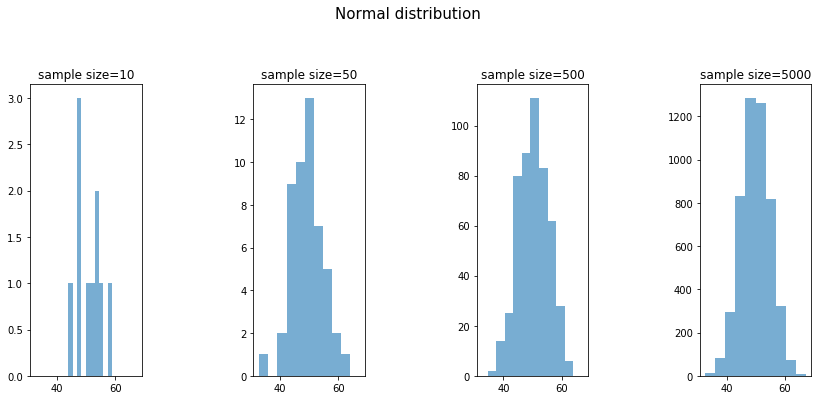

In [3]:
# Create figure and axes

fig, ax = plt.subplots(1,4, sharex=True, figsize=(14,6))
plt.subplots_adjust(top=.8, wspace=1)
fig.suptitle("Normal distribution", fontsize=15)

# Variables

sample_size = [10, 50, 500, 5000]

# Plot each histogram

for i in range(len(dists)):
    ax[i].hist(dists[i], alpha=0.6)
    ax[i].set_title(f'sample size={sample_size[i]}')

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`

The **central limit theorem** states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed

More sample (5000) --> Curve approximately normally distributed

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

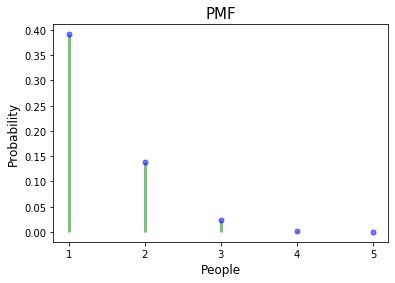

In [4]:
# Variables 
p = 0.15
sample = 5

# Binomial distribution
x = range(1,sample+1)
binom = stats.binom(sample, p)

# Plot line + bullet point -> Discrete Distribution Representation

plt.plot(x, binom.pmf(x), 'bo', ms=5, alpha=0.5)
plt.vlines(x, 0, binom.pmf(x), colors='g', lw=3, alpha=0.5)
my_xticks = [1,2,3,4,5]
plt.xticks(x, my_xticks)
plt.xlabel ('People', fontsize=12)
plt.ylabel ('Probability', fontsize=12)

plt.title('PMF', fontsize=15);

#### Explain what you observe from the plot above.

`Comments:`

pmf: probability mass function

Frozen pmf: the distribution object can be called (as a function) to fix the shape and location.

The probability that 1 person watches the ads is aprox 40%, the probability that 5 people watch the ads is 0.

#### Now plot PMP with 50, 500, and 5000 visitors.

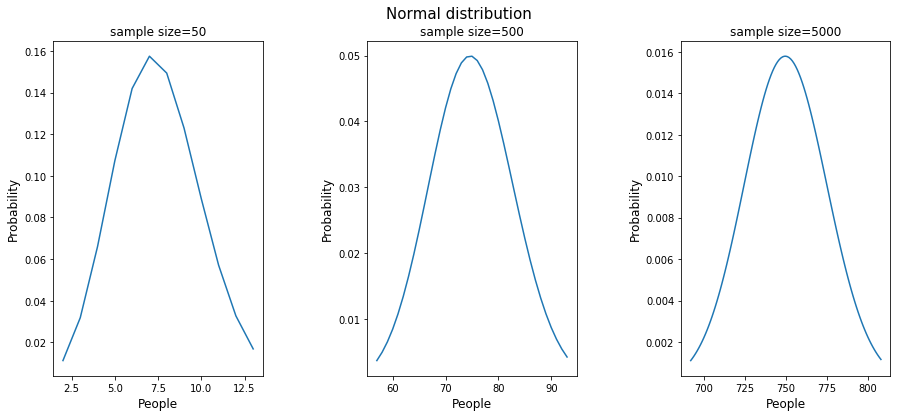

In [5]:
# Create figure and axes
fig, ax = plt.subplots(1,3, figsize=(15,6))
plt.subplots_adjust(top=.9, wspace=.5)
fig.suptitle("Normal distribution", fontsize=15)

# Variables
p = 0.15
sample_size = [50, 500, 5000]
x = [np.arange(stats.binom.ppf(0.01,n,p), stats.binom.ppf(0.99,n,p)) for n in sample_size]

# Plot each PMF
# For visualization reasons, the next discrete distributions are represented using continuous lines
for i in range(len(x)):
    ax[i].plot(x[i], stats.binom.pmf(x[i], sample_size[i], p))
    ax[i].set_title(f'sample size={sample_size[i]}')
    ax[i].set_xlabel('People', fontsize=12)
    ax[i].set_ylabel('Probability', fontsize=12);

#### What did you notice from the distribution plots? Comment your findings.

`Comments:`

Bigger sample --> best approximation to a normal distribution

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>

The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [6]:
# Variables
mu = 300
visits = 320

# Probability
p320 = stats.poisson(mu).pmf(visits)
round(p320,3)

0.012

#### What is the probability of getting 60 visits?

In [7]:
# Variables
visits = 60

# Probability
p60 = stats.poisson(mu).pmf(visits)
round(p60,3)

0.0

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

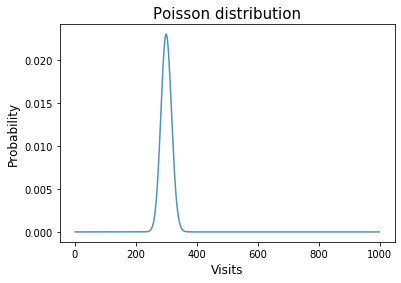

In [8]:
# Variables
visits = range(1000)

# Plot of the distribution

poisson = stats.poisson(mu).pmf(visits)
plt.plot(visits, poisson, alpha=0.8)
plt.xlabel ('Visits', fontsize=12)
plt.ylabel ('Probability', fontsize=12)
plt.title('Poisson distribution', fontsize=15);

# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [9]:
# Variables
mean = 35
std = 8


# Probability
# obj+mean+std
p35=stats.norm.cdf(35,35,8)
p30=stats.norm.cdf(30,35,8)
p=p35-p30
print(f'The probability that the mean delivery time today is between 30 and 35 minutes is {round(p,3)}')

The probability that the mean delivery time today is between 30 and 35 minutes is 0.234


#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [22]:
# Variables
# population
packages =200
min = 115*60
mean_pop = packages*mean
std_pop = std*(packages**(1/2))

# Probability
# obj+mean+std(SAMPLE)
p_sample=stats.norm.sf(min, mean_pop, std_pop)

print(f'The probability that in total, it takes more than 115 hours to deliver all 200 packages is: {round(p_sample,3)}')

The probability that in total, it takes more than 115 hours to deliver all 200 packages is: 0.812


# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [24]:
# Variables
# mean
mu = 200
# std
sigma = 40
monthly_sales = 300

# Probability
p=stats.norm.sf(monthly_sales, mu, sigma)

print(f'The probability robability that the monthly sales are more than 300 is: {round(p,3)}')

The probability robability that the monthly sales are more than 300 is: 0.006


#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [25]:
# Probability
monthly_sales_min = 160
monthly_sales_max = 240
p=stats.norm.cdf(monthly_sales_max, mu, sigma) - stats.norm.cdf(monthly_sales_min, mu, sigma)

print(f'The probability that the monthly sales fall between 160 and 240 is: {round(p,3)}')

The probability that the monthly sales fall between 160 and 240 is: 0.683


#### 3. Find the probability that the monthly sales do not exceed 150.

In [26]:
# Probability
monthly_sales = 150
p=stats.norm.cdf(monthly_sales, mu, sigma)

print(f'The probability that the monthly sales do not exceed 150 is: {round(p,3)}')

The probability that the monthly sales do not exceed 150 is: 0.106


#### 4. Find the probability that the monthly sales exceed 3000. 

In [27]:
# Probability
monthly_sales = 3000
p=stats.norm.sf(monthly_sales, mu, sigma)

print(f'The probability that the monthly sales exceed 3000 is: {round(p,3)}')

The probability that the monthly sales exceed 3000 is: 0.0


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [30]:
# Variables
mu = 4
robbery = 0

# Probability
poisson = stats.poisson(mu).pmf(robbery)

print(f'The probability that in a particular month there is no violent robbery is: {round(poisson,3)}')

The probability that in a particular month there is no violent robbery is: 0.018


#### 2. The probability that there are at least 1 in a given month. 

In [32]:
# Probability
robbery = 1

poisson = stats.poisson(mu).cdf(robbery)

print(f'The probability that there are at least 1 in a given month is: {round(poisson,3)}')

The probability that there are at least 1 in a given month is: 0.092


#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [33]:
# Probability
robbery_min = 2
robbery_max = 6

poisson = stats.poisson(mu).cdf(robbery_max) - stats.poisson(mu).cdf(robbery_min)

print(f'The probability that there are between 2 and 6 (inclusive) in a given month: {round(poisson,3)}')

The probability that there are between 2 and 6 (inclusive) in a given month: 0.651


#### 4. The probability that there more than two in 15 days.  

In [34]:
# Probability
robbery = 4

poisson = stats.poisson(mu).sf(robbery)

print(f'The probability that there are between 2 and 6 (inclusive) in a given month is: {round(poisson,3)}')

The probability that there are between 2 and 6 (inclusive) in a given month is: 0.371
